In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country = df['country']

In [4]:
df = df.drop('country', axis=1)

<AxesSubplot:>

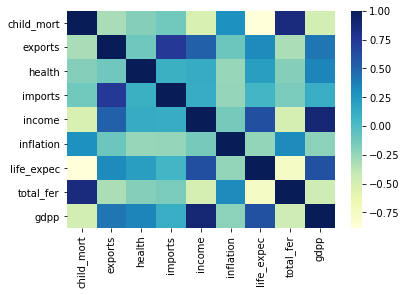

In [5]:
sns.heatmap(df.corr(), cmap="YlGnBu")

<AxesSubplot:xlabel='imports', ylabel='exports'>

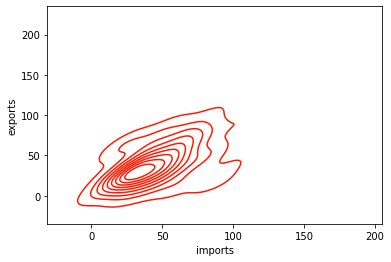

In [6]:
sns.kdeplot(data=df, x=df['imports'], y=df['exports'], color='#fc1c03')

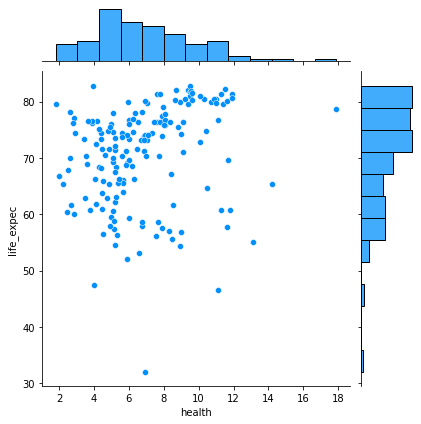

In [7]:
sns.jointplot(data=df, x=df['health'], y=df['life_expec'], color='#0390fc')

In [8]:
df['child_mort'] = df['child_mort']/df['child_mort'].mean()

In [9]:
df['exports'] = df['exports']/df['exports'].mean()

In [10]:
df['health'] = df['health']/df['health'].mean()

In [11]:
df['imports'] = df['imports']/df['imports'].mean()

In [12]:
df['income'] = df['income']/df['income'].mean()

In [13]:
df['inflation'] = df['inflation']/df['inflation'].mean()

In [14]:
df['life_expec'] = df['life_expec']/df['life_expec'].mean()

In [15]:
df['total_fer'] = df['total_fer']/df['total_fer'].mean()

In [16]:
df['gdpp'] = df['gdpp']/df['gdpp'].mean()

In [17]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,2.356934,0.243256,1.112140,0.957556,0.093907,1.213082,0.796534,1.974244,0.042656
1,0.433759,0.681116,0.961018,1.036464,0.579188,0.576985,1.081415,0.559708,0.315485
2,0.713351,0.934103,0.611824,0.669649,0.752420,2.068921,1.084250,0.980338,0.344025
3,3.109480,1.515484,0.418153,0.914903,0.344130,2.878499,0.851809,2.089578,0.272289
4,0.269140,1.106814,0.884724,1.256126,1.114048,0.185046,1.088502,0.722533,0.941056


In [18]:
features = df.T
cov_matrix = np.cov(features)
cov_matrix[:9]

array([[ 1.11049127, -0.22351991, -0.08511047, -0.06921292, -0.62127484,
         0.41265618, -0.1177734 ,  0.45915379, -0.71964973],
       [-0.22351991,  0.44463992, -0.03074577,  0.25386408,  0.38747782,
        -0.09718591,  0.02658553, -0.10957929,  0.39474842],
       [-0.08511047, -0.03074577,  0.1624226 ,  0.01991664,  0.05872059,
        -0.13980574,  0.01070277, -0.04070335,  0.19712585],
       [-0.06921292,  0.25386408,  0.01991664,  0.26656946,  0.07106286,
        -0.17322642,  0.00353959, -0.04216912,  0.08430781],
       [-0.62127484,  0.38747782,  0.05872059,  0.07106286,  1.26435141,
        -0.22568415,  0.08673279, -0.28977384,  1.42371044],
       [ 0.41265618, -0.09718591, -0.13980574, -0.17322642, -0.22568415,
         1.84520268, -0.04104155,  0.22107168, -0.42563781],
       [-0.1177734 ,  0.02658553,  0.01070277,  0.00353959,  0.08673279,
        -0.04104155,  0.01588727, -0.04924904,  0.10693699],
       [ 0.45915379, -0.10957929, -0.04070335, -0.04216912, -0

In [19]:
values, vectors = np.linalg.eig(cov_matrix)

In [20]:
values[:9]

array([3.93034342e+00, 1.71852360e+00, 7.89372866e-01, 5.36509554e-01,
       2.14248044e-01, 2.64625428e-03, 8.17705478e-02, 6.00165061e-02,
       3.86661490e-02])

In [21]:
vectors[:9]

array([[ 3.73043188e-01, -7.27149506e-02,  8.25405642e-01,
        -1.08881342e-01,  6.35172766e-02, -9.30994288e-02,
         1.45801092e-01,  3.55979248e-01, -4.14796814e-02],
       [-1.73896682e-01, -6.05075669e-02, -2.96733176e-02,
        -7.49954416e-01,  2.38526619e-02,  1.54844102e-02,
        -1.78993762e-01,  1.15376872e-02, -6.08116802e-01],
       [-6.30604412e-02,  4.68018749e-02,  4.11179325e-02,
         1.61560859e-01, -6.49469474e-01, -2.75530361e-05,
         6.05530369e-01, -1.48371061e-01, -3.94396719e-01],
       [-6.08618571e-02,  7.63037836e-02, -9.27577428e-04,
        -5.98242496e-01, -3.70521151e-01, -3.10331005e-02,
         1.82057280e-01, -3.90348259e-02,  6.77983093e-01],
       [-5.13777698e-01, -2.65230281e-01,  1.31031645e-01,
        -4.78545813e-02,  5.43527001e-01, -4.57257128e-03,
         5.66264436e-01, -1.55305273e-01,  7.75137004e-02],
       [ 3.00882075e-01, -9.17687080e-01, -2.20098538e-01,
        -2.38513629e-02, -1.27666296e-01,  1.125192

In [22]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances),  explained_variances)

1.0 [0.5331377835255419, 0.2331119097981974, 0.10707575770544502, 0.07277570527295317, 0.02906202201883188, 0.0003589554376103408, 0.011091898067015481, 0.008141035930381424, 0.005244932244023552]


In [23]:
n_components = 5
eigenvector_subset = vectors[:,0:n_components]


In [24]:
X_reduced = np.dot(eigenvector_subset.transpose(),df.transpose()).transpose()


In [25]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters
        self.max_iterations = 100
        self.plot_figure = True
        self.num_examples = X.shape[0]
        self.num_features = X.shape[1]

    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features))

        for k in range(self.K):
            centroid = X[np.random.choice(range(self.num_examples))]
            centroids[k] = centroid

        return centroids

    def create_clusters(self, X, centroids):
        # Will contain a list of the points that are associated with that specific cluster
        clusters = [[] for _ in range(self.K)]

        # Loop through each point and check which is the closest cluster
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)

        return clusters

    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid

        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx

        return y_pred

    def plot_fig(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()
        
    

    def fit(self, X):
        centroids = self.initialize_random_centroids(X)

        for it in range(self.max_iterations):
            clusters = self.create_clusters(X, centroids)
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)

            diff = centroids - previous_centroids

            if not diff.any():
                print("Termination criterion satisfied")
                break

        # Get label predictions
        y_pred = self.predict_cluster(clusters, X)

        if self.plot_figure:
            self.plot_fig(X, y_pred)
        return y_pred
           
        

        
       
    


Termination criterion satisfied


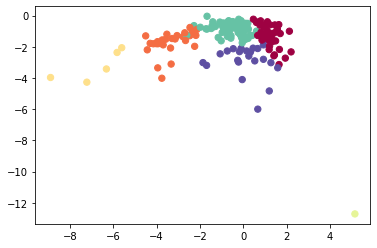

In [29]:
 Kmeans = KMeansClustering(X_reduced, 6)
 y_pred = Kmeans.fit(X_reduced)

In [27]:
y_pred

array([0., 2., 2., 0., 3., 2., 2., 4., 4., 2., 3., 3., 2., 3., 2., 4., 2.,
       0., 2., 2., 2., 2., 2., 4., 3., 0., 0., 2., 0., 4., 2., 0., 0., 2.,
       2., 2., 0., 0., 0., 2., 0., 3., 3., 3., 4., 2., 2., 2., 2., 0., 0.,
       3., 2., 4., 4., 2., 0., 2., 4., 0., 3., 2., 2., 0., 0., 2., 0., 3.,
       4., 2., 2., 2., 2., 4., 3., 4., 2., 4., 2., 2., 0., 2., 4., 2., 0.,
       3., 3., 0., 0., 3., 3., 5., 2., 0., 0., 3., 3., 0., 3., 0., 3., 2.,
       2., 1., 3., 2., 0., 2., 2., 2., 4., 4., 0., 1., 4., 3., 0., 3., 2.,
       2., 2., 3., 3., 5., 2., 2., 0., 2., 3., 0., 2., 3., 0., 5., 3., 3.,
       2., 2., 3., 4., 2., 2., 0., 2., 4., 4., 2., 0., 3., 0., 0., 2., 2.,
       2., 2., 0., 2., 4., 4., 4., 2., 2., 2., 1., 2., 0., 0.])

In [32]:
cluster_country = pd.DataFrame({'Country':country,'Cluster':y_pred})
cluster_country.head()

,Country,Cluster
0,Afghanistan,0.0
1,Albania,4.0
2,Algeria,5.0
3,Angola,0.0
4,Antigua and Barbuda,4.0


In [33]:
cluster0 = cluster_country[cluster_country['Cluster'] == 0]
cluster0.shape

(40, 2)

In [34]:
cluster0

,Country,Cluster
0,Afghanistan,0.0
3,Angola,0.0
17,Benin,0.0
25,Burkina Faso,0.0
26,Burundi,0.0
28,Cameroon,0.0
31,Central African Republic,0.0
32,Chad,0.0
36,Comoros,0.0
37,"Congo, Dem. Rep.",0.0


In [35]:
cluster1 = cluster_country[cluster_country['Cluster'] == 1]
cluster1.shape

(29, 2)

In [36]:
cluster1

,Country,Cluster
7,Australia,1.0
8,Austria,1.0
10,Bahamas,1.0
11,Bahrain,1.0
15,Belgium,1.0
23,Brunei,1.0
29,Canada,1.0
42,Cyprus,1.0
44,Denmark,1.0
53,Finland,1.0


In [37]:
cluster2 = cluster_country[cluster_country['Cluster'] == 2]
cluster2.shape

(5, 2)

In [38]:
cluster2

,Country,Cluster
91,Luxembourg,2.0
114,Norway,2.0
123,Qatar,2.0
133,Singapore,2.0
145,Switzerland,2.0


In [39]:
cluster3 = cluster_country[cluster_country['Cluster'] == 3]
cluster3.shape

(1, 2)

In [40]:
cluster3

,Country,Cluster
113,Nigeria,3.0


In [41]:
cluster4 = cluster_country[cluster_country['Cluster'] == 4]
cluster4.shape

(70, 2)

In [42]:
cluster4

,Country,Cluster
1,Albania,4.0
4,Antigua and Barbuda,4.0
6,Armenia,4.0
12,Bangladesh,4.0
13,Barbados,4.0
...,...,...
154,Turkmenistan,4.0
156,Ukraine,4.0
160,Uruguay,4.0
162,Vanuatu,4.0


In [43]:
cluster5 = cluster_country[cluster_country['Cluster'] == 5]
cluster5.shape

(22, 2)

In [44]:
cluster5

,Country,Cluster
2,Algeria,5.0
5,Argentina,5.0
9,Azerbaijan,5.0
14,Belarus,5.0
38,"Congo, Rep.",5.0
49,Equatorial Guinea,5.0
55,Gabon,5.0
70,Indonesia,5.0
71,Iran,5.0
72,Iraq,5.0
